In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df_dados = pd.read_csv("Kmeans2.csv",delimiter=',') 

df_dados

,x,y
0,0.187638,0.893959
1,0.164452,0.915416
2,0.185263,0.868342
3,0.147249,0.859080
4,0.150564,0.841006
...,...,...
817,0.143128,0.300868
818,0.130175,0.280569
819,0.121877,0.277660
820,0.130575,0.306899


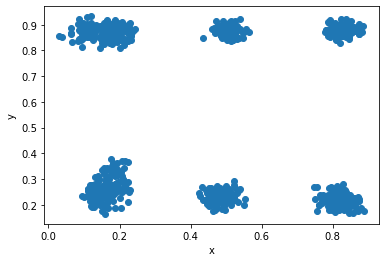

In [4]:
plt.scatter(df_dados['x'].array,df_dados['y'])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [5]:
model = KMeans(n_clusters=6,random_state=0).fit(df_dados.values)

In [6]:
df_dados_rotulados = df_dados.copy()
df_dados_rotulados['rotulo'] = model.labels_

df_dados_rotulados

,x,y,rotulo
0,0.187638,0.893959,3
1,0.164452,0.915416,3
2,0.185263,0.868342,3
3,0.147249,0.859080,3
4,0.150564,0.841006,3
...,...,...,...
817,0.143128,0.300868,2
818,0.130175,0.280569,2
819,0.121877,0.277660,2
820,0.130575,0.306899,2


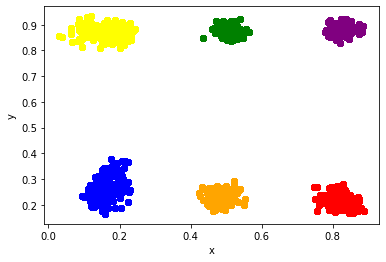

In [12]:
cores = ["green","red","blue","yellow","purple","orange"]



for i in df_dados_rotulados["rotulo"]:
    
    df_pintar = df_dados_rotulados[df_dados_rotulados["rotulo"]==i]
    plt.scatter(df_pintar["x"].array,df_pintar["y"].array,color = cores[i])
    
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [10]:
arr = []

for i in range(2,10):
    cluster = KMeans(n_clusters=i,random_state=0).fit(df_dados.values)
    label = cluster.labels_
    arr.append([i,silhouette_score(df_dados.values,label)])

df = pd.DataFrame(arr,columns=["k","score"])
df

,k,score
0,2,0.561292
1,3,0.614904
2,4,0.711602
3,5,0.789849
4,6,0.844433
5,7,0.774571
6,8,0.711833
7,9,0.624155
